https://www.kaggle.com/masumrumi/a-detailed-regression-guide-with-house-pricing

https://www.kaggle.com/vanshjatana/house-price-prediction

## 导入工具包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec  as gridspec
import matplotlib.style as style
import seaborn as sns
from datetime import datetime
from scipy.stats import skew
import scipy.stats as stats
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import sklearn.linear_model as linear_model
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import missingno as msno
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

print(os.listdir('input'))

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv', '字段解析.xlsx']


## 读入数据

In [2]:
train = pd.read_csv('input/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('input/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print(f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test has {test.shape[0]} rows and {test.shape[1]} columns")

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 查看缺失值

### 训练集中的缺失值

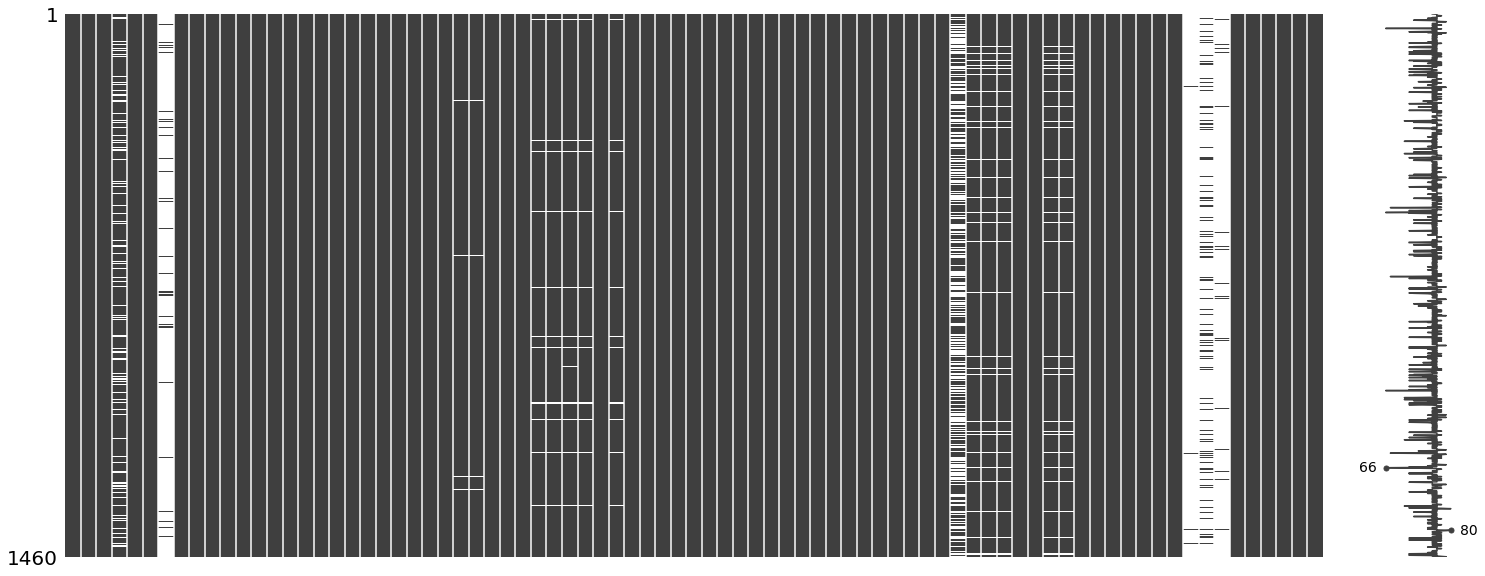

In [7]:
msno.matrix(train)

In [8]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_percentage(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


### 测试集中的缺失值

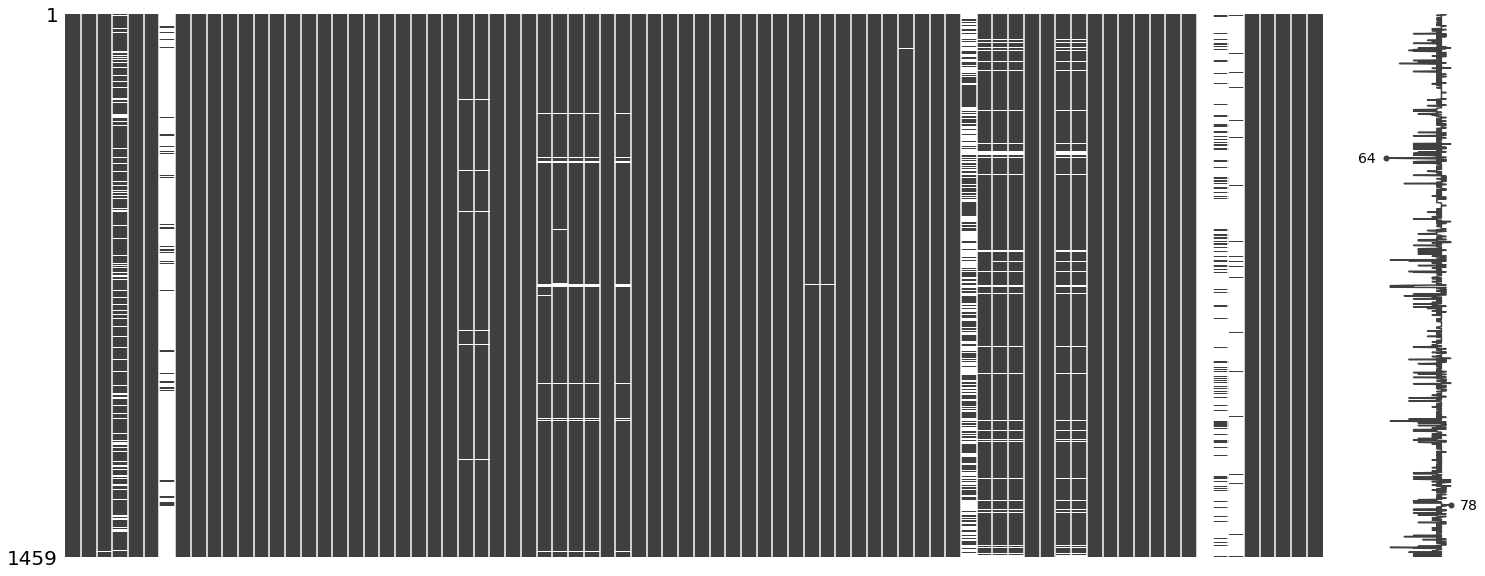

In [9]:
msno.matrix(test)

In [10]:
missing_percentage(test)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


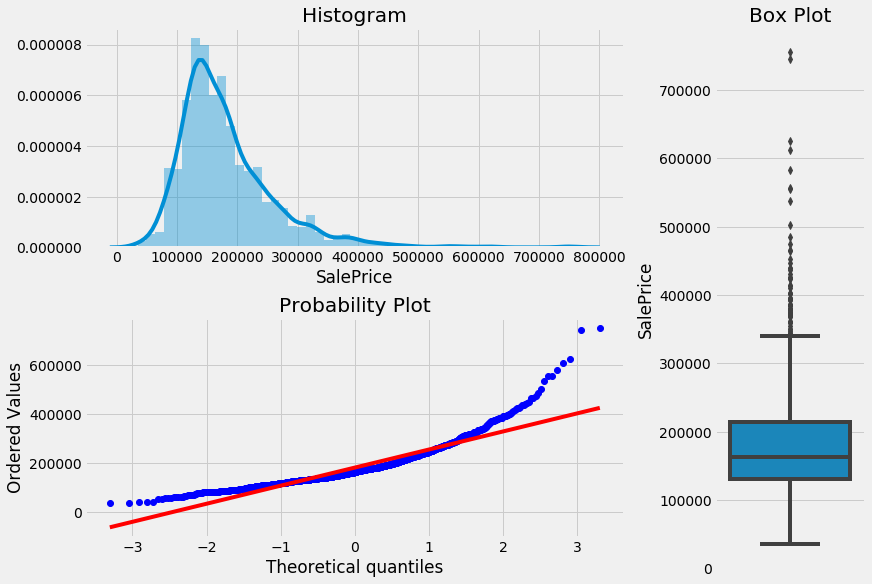

In [11]:
def plotting_3_chart(df, feature):
    style.use('fivethirtyeight')
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature], norm_hist=True, ax=ax1)
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:, feature], plot=ax2)
    
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:, feature], orient='v', ax=ax3)
    
plotting_3_chart(train, 'SalePrice')

In [12]:
print('Skewness: ' + str(train['SalePrice'].skew()))
print('Kurtosis: ' + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [13]:
(train.corr() ** 2)['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

**SalePrice vs OverallQual**

In [14]:
def customized_scatterplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize=(12, 8))
    sns.scatterplot(y=y, x=x)

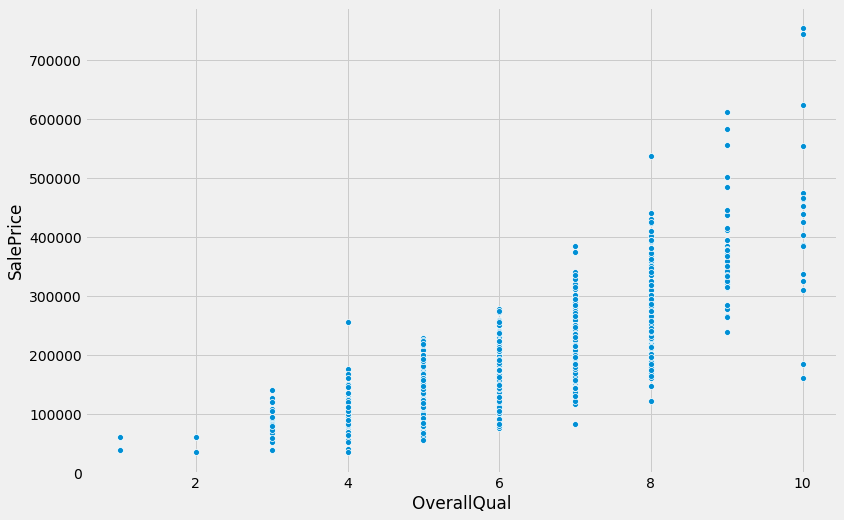

In [15]:
customized_scatterplot(train.SalePrice, train.OverallQual)

**SalePrice vs GrLivArea**

右下方两个异常值，需要剔除

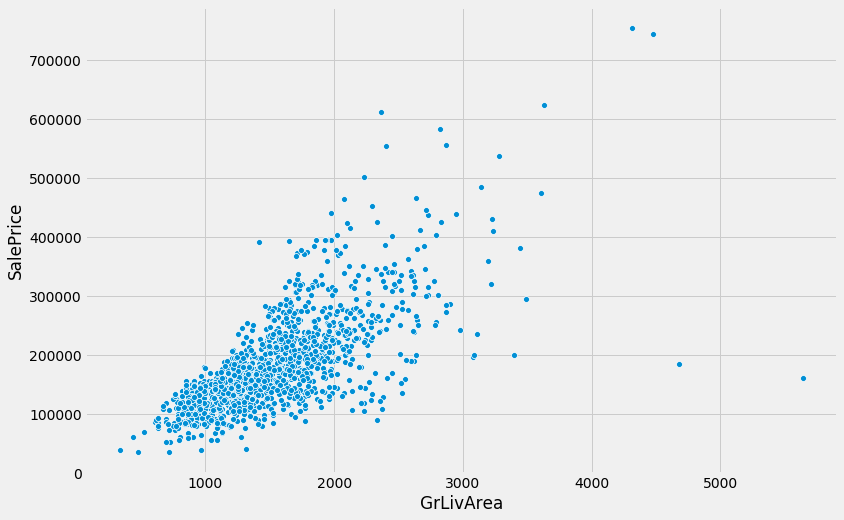

In [16]:
customized_scatterplot(train.SalePrice, train.GrLivArea)

**SalePrice vs GarageArea**

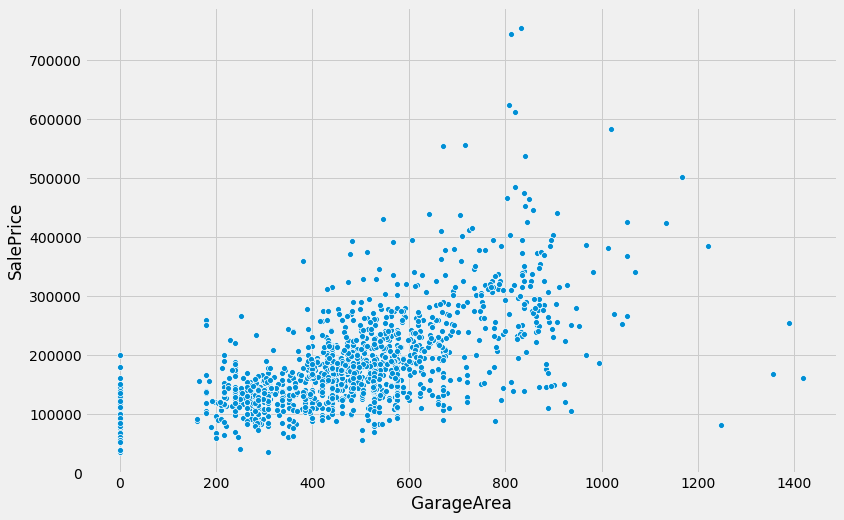

In [17]:
customized_scatterplot(train.SalePrice, train.GarageArea)

**SalePrice vs TotalBsmtSF**

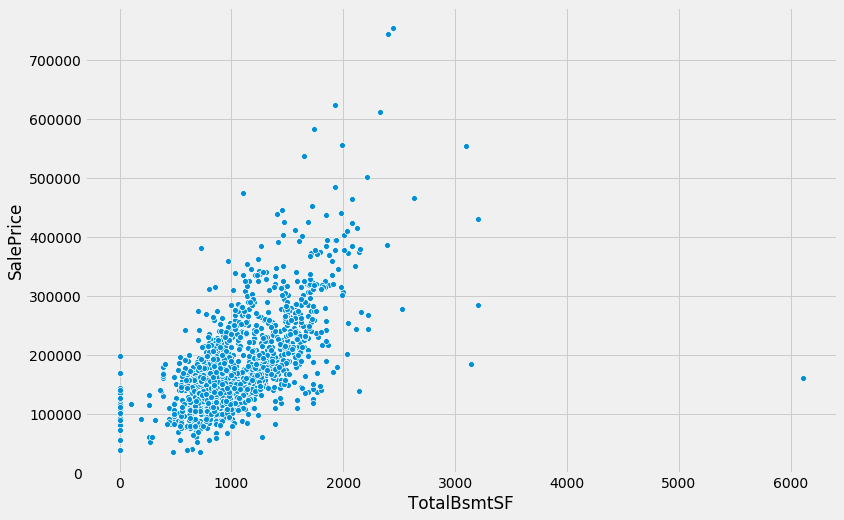

In [18]:
customized_scatterplot(train.SalePrice, train.TotalBsmtSF)

**SalePrice vs 1stFlrSF**

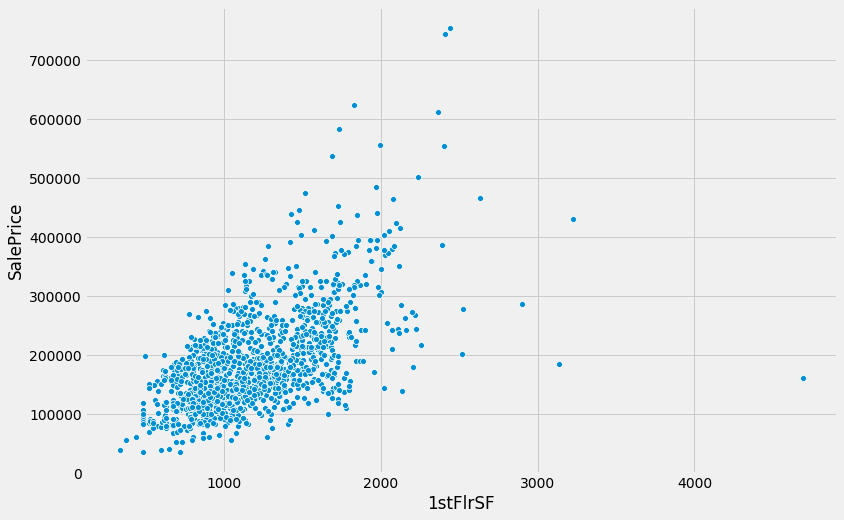

In [19]:
customized_scatterplot(train.SalePrice, train['1stFlrSF'])

**SalePrice vs MasVnrArea**

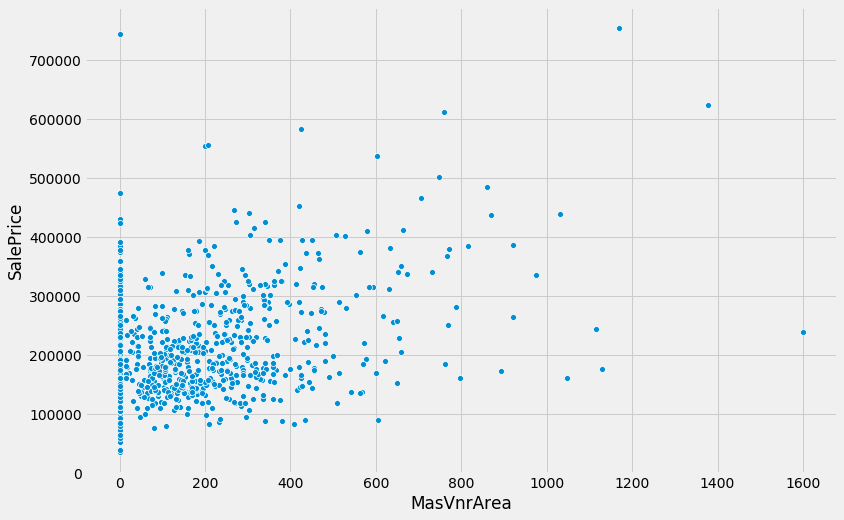

In [20]:
customized_scatterplot(train.SalePrice, train.MasVnrArea)

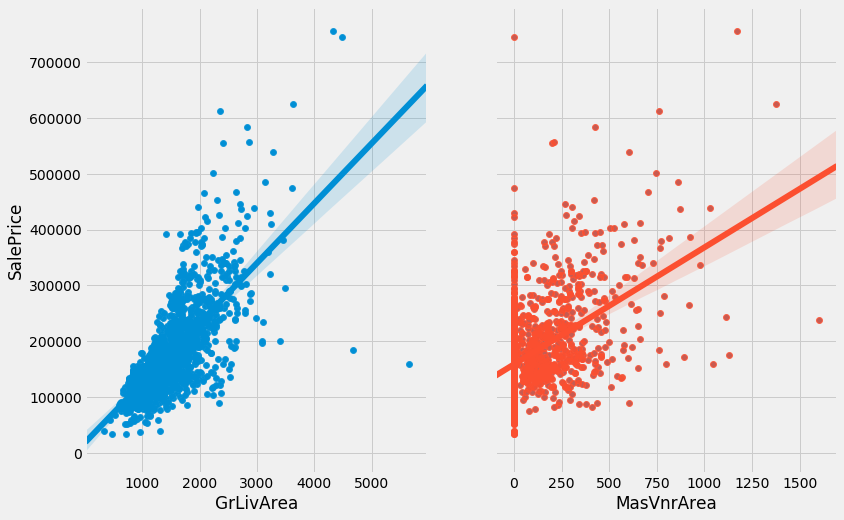

In [21]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 8), ncols=2, sharey=True)
sns.scatterplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

sns.scatterplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2)
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2)

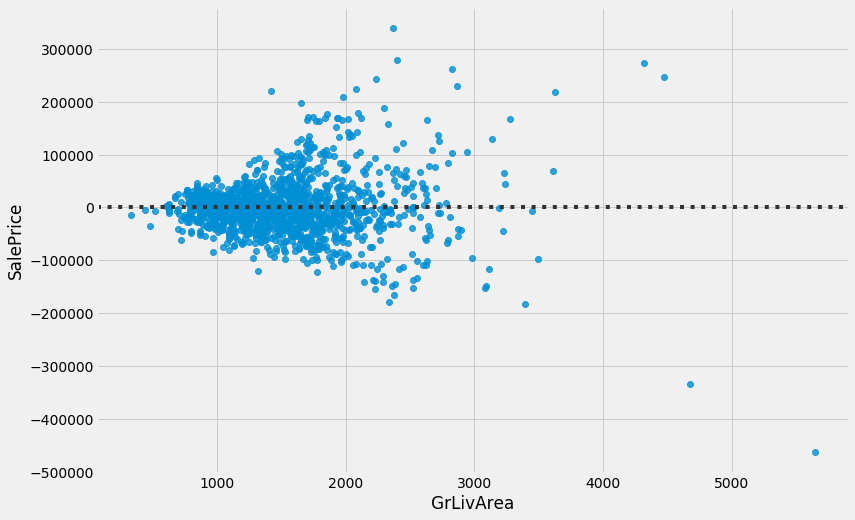

In [22]:
plt.subplots(figsize=(12, 8))
sns.residplot(train.GrLivArea, train.SalePrice)

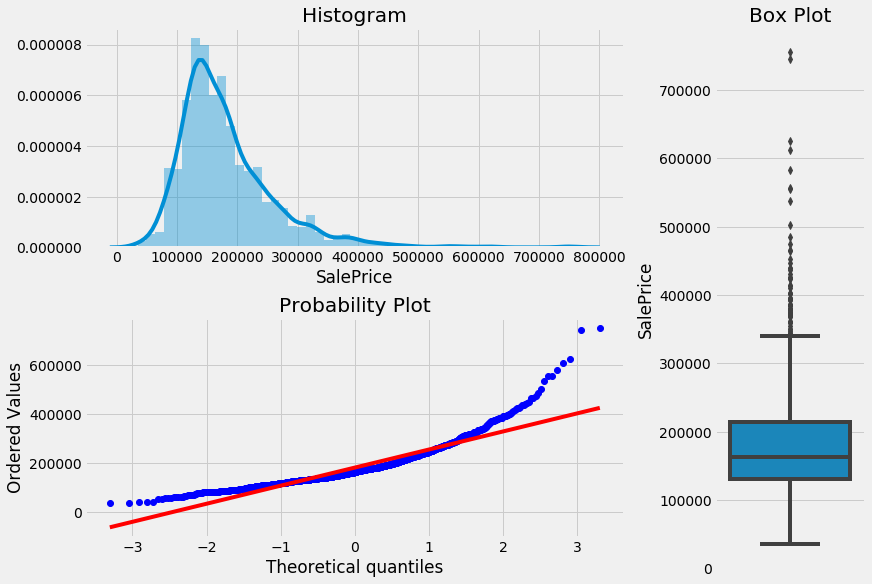

In [23]:
plotting_3_chart(train, 'SalePrice')

In [24]:
previous_train = train.copy()

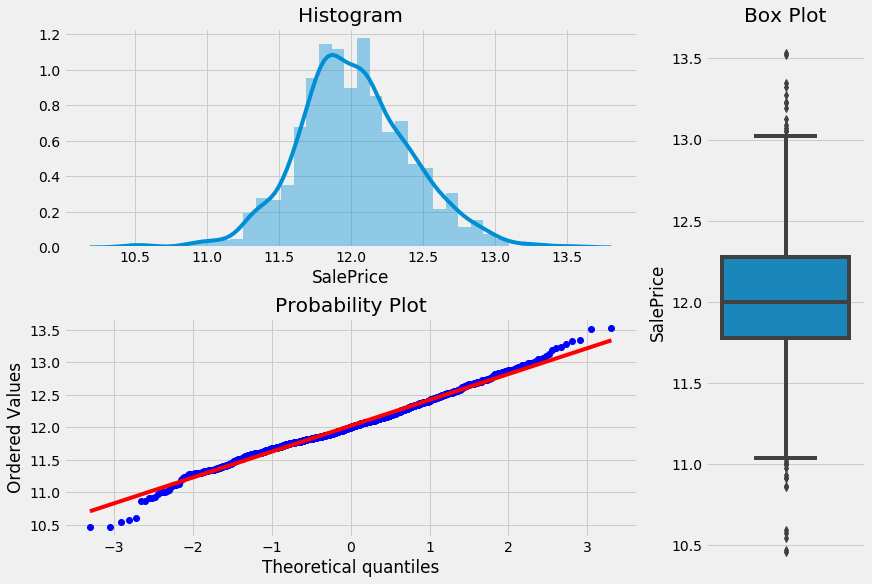

In [25]:
train['SalePrice'] = np.log1p(train['SalePrice'])

plotting_3_chart(train, 'SalePrice')

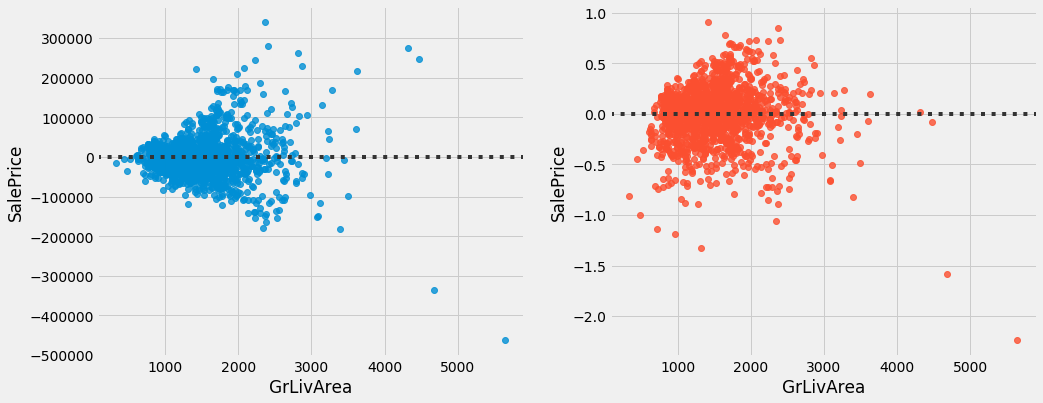

In [26]:
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6),
                               ncols=2,
                               sharey=False,
                               sharex=False)

sns.residplot(x=previous_train.GrLivArea, y=previous_train.SalePrice, ax=ax1)

sns.residplot(x=train.GrLivArea, y=train.SalePrice, ax=ax2)

Text(0.5, 1, 'Heatmap off all the features')

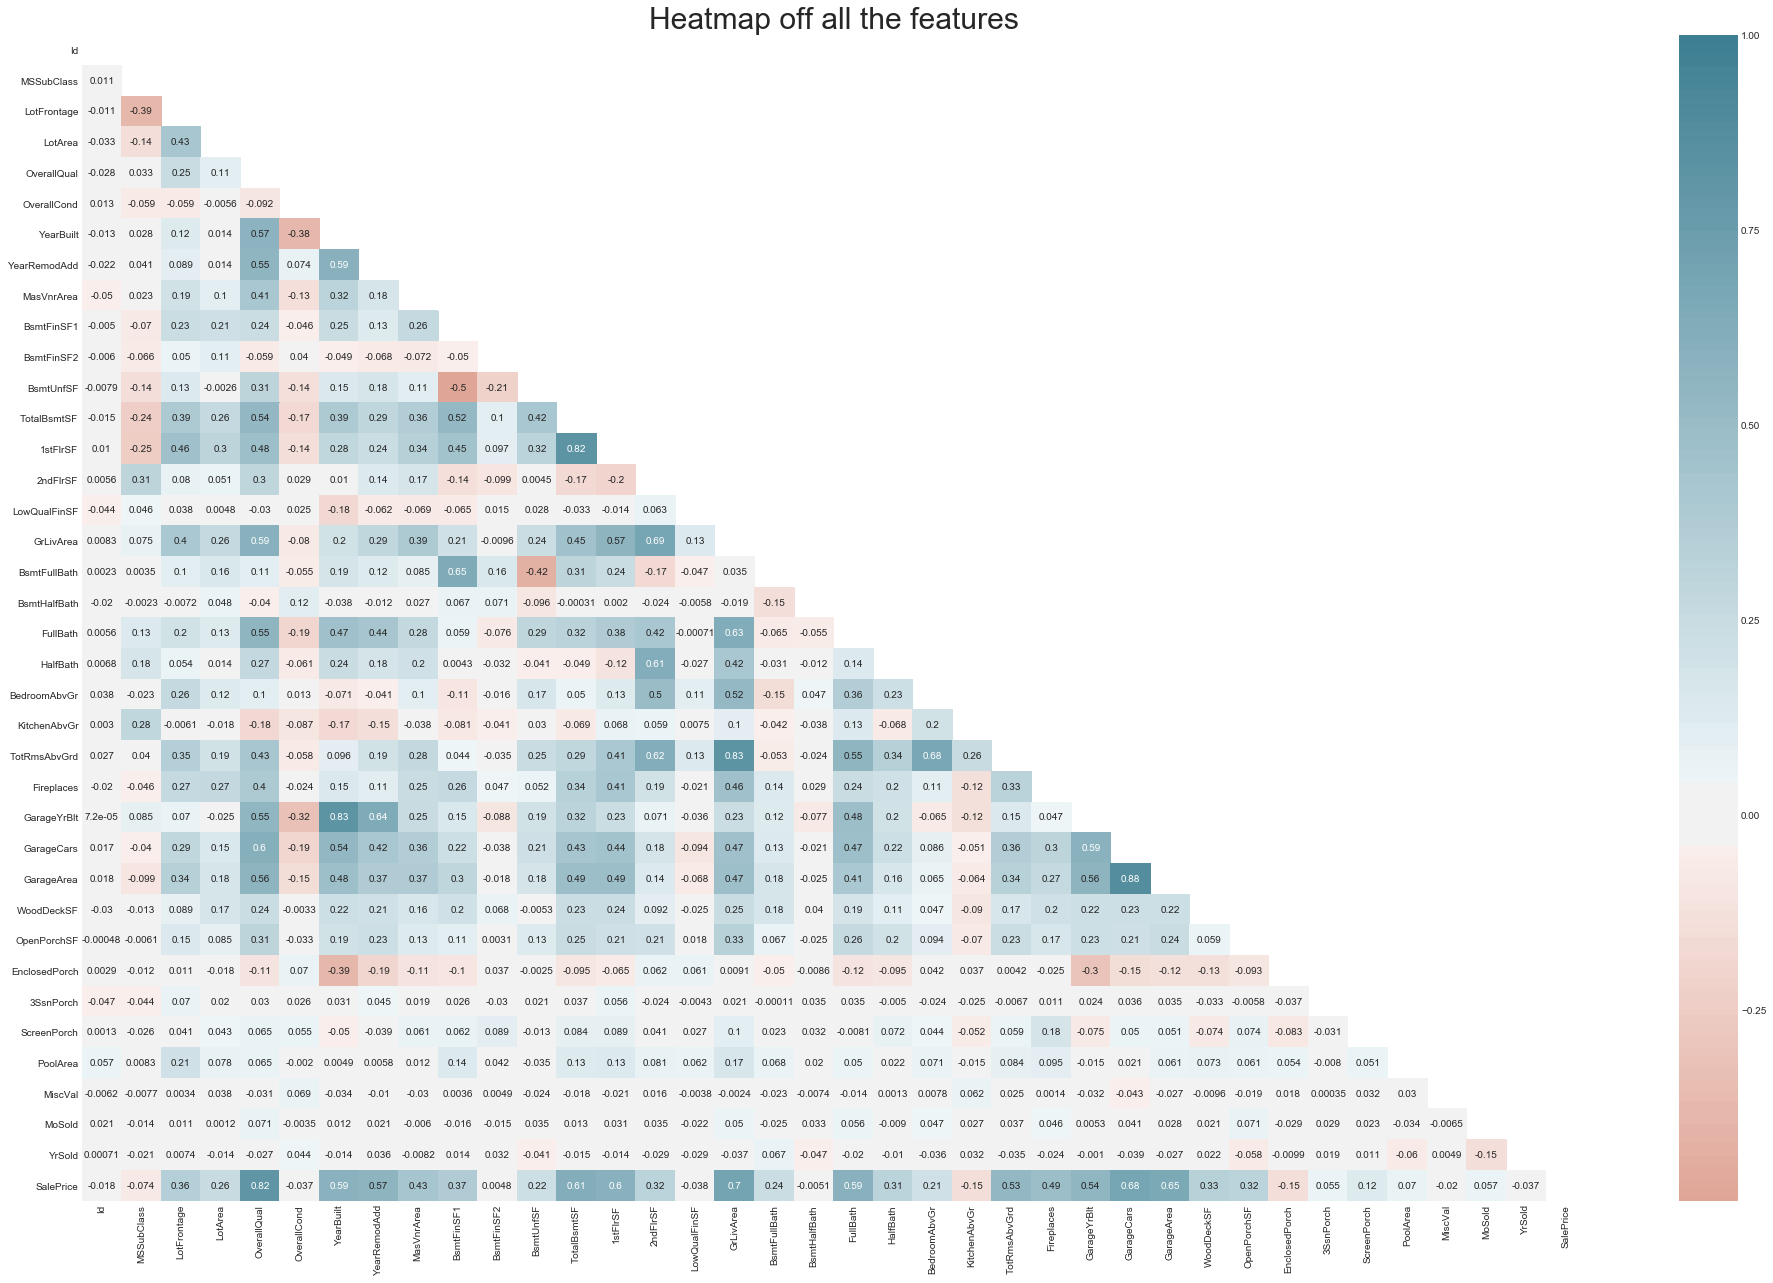

In [27]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize=(30, 20))

mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(),
            cmap=sns.diverging_palette(20, 220, n=200),
            mask=mask,
            annot=True,
            center=0)
plt.title('Heatmap off all the features', fontsize=30)

## Feature Engineering

In [28]:
# 删除Id列
train.drop(columns=['Id'], axis=1, inplace=True)
test.drop(columns=['Id'], axis=1, inplace=True)

# 保存target
y = train['SalePrice'].reset_index(drop=True)

previous_train = train.copy()

In [29]:
# 拼接train和test
all_data = pd.concat([train, test], ignore_index=True)

# 删除target
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [30]:
missing_percentage(all_data)

,Total,Percent
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageFinish,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageCond,159,5.45


In [31]:
# 缺失值用'None'来填充
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [32]:
# 缺失值用0填充
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

In [33]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [34]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [35]:
all_data['Functional'] = all_data['Functional'].fillna('Typ') 
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub') 
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) 
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA") 
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna("SBrkr")

In [36]:
missing_percentage(all_data)

,Total,Percent


In [37]:
numeric_feats = all_data.select_dtypes(exclude='object').columns
numeric_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

In [38]:
len(numeric_feats)

33

In [39]:
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
LotFrontage       1.460429
BsmtFinSF1        1.425230
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.239257
OverallQual       0.197110
FullBath          0.167606
GarageCars       -0.219581
YearRemodAdd     -0.451020
YearBuilt        -0.599806
GarageYrBlt      -3.906205
dtype: float64

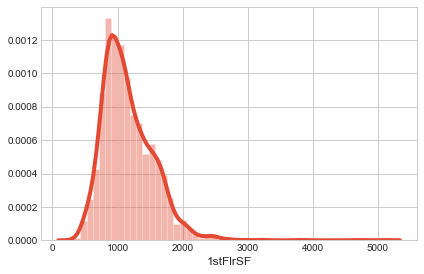

In [40]:
sns.distplot(all_data['1stFlrSF'])

In [41]:
def fixing_skewness(df):
    # 得到数值型的变量
    numeric_feats = all_data.select_dtypes(exclude='object').columns
    
    # 计算偏度
    skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index
    
    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

In [42]:
fixing_skewness(all_data)

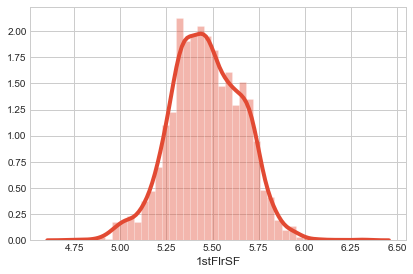

In [43]:
sns.distplot(all_data['1stFlrSF'])

### Creating New Features

In [44]:
all_data['TotalSF'] = (all_data['TotalBsmtSF']
                       + all_data['1stFlrSF']
                       + all_data['2ndFlrSF'])

all_data['YrBltAndRemod'] = (all_data['YearBuilt'] + all_data['YearRemodAdd'])

all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1']
                                 + all_data['BsmtFinSF2']
                                 + all_data['1stFlrSF']
                                 + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath']
                               + 0.5 * all_data['HalfBath']
                               + all_data['BsmtFullBath']
                               + 0.5 * all_data['BsmtHalfBath'])

all_data['Total_porch_sf'] = (all_data['OpenPorchSF']
                              + all_data['3SsnPorch'] 
                              + all_data['EnclosedPorch']
                              + all_data['ScreenPorch']
                              + all_data['WoodDeckSF'])

In [45]:
# 是否有
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [46]:
all_data.shape

(2919, 89)

### Deleting features

In [47]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC'], axis=1)

In [48]:
all_data.shape

(2919, 86)

### Create Dummy Variables

In [49]:
final_features = pd.get_dummies(all_data).reset_index(drop=True)
final_features.shape

(2919, 334)

In [50]:
X = final_features.iloc[:len(y), :]

X_sub = final_features.iloc[len(y):, :]

In [51]:
counts = X.BsmtUnfSF.value_counts()
counts.iloc[0]

118

In [52]:
for i in X.columns:
    counts = X[i].value_counts()
    print(counts)

5.324021    25
5.435690    16
5.356741    14
5.312679    12
5.344693    12
5.170236    11
5.130291     9
5.289290     9
4.963868     7
5.387665     7
5.372416     7
5.301105     7
5.406161     6
5.306922     6
5.212733     6
5.444819     6
5.336515     6
5.219520     6
5.733894     6
5.249101     6
5.257053     5
5.462639     5
5.427578     5
5.520856     5
5.380092     5
5.492512     5
5.319794     5
5.404946     5
5.275697     5
5.274167     5
5.252295     5
5.538337     5
5.453800     5
5.400063     5
5.479906     5
5.458237     5
5.193645     5
5.649563     5
5.261772     5
5.280265     5
5.574410     5
5.010419     5
5.608254     5
5.386410     5
5.620732     5
5.116338     5
5.382627     4
5.343338     4
5.325423     4
5.445384     4
5.393898     4
5.321207     4
5.484140     4
5.628085     4
5.311963     4
5.628895     4
5.441413     4
5.464827     4
5.488342     4
5.570817     4
5.514904     4
5.367239     4
5.337886     4
5.443118     4
5.284795     4
5.440273     4
5.584609  

Name: Total_sqr_footage, dtype: int64
2.000000    234
1.000000    227
1.992784    208
2.534676    200
2.992784    163
3.527460    126
1.534676     99
2.527460     68
1.355405     28
2.355405     21
1.890081     11
3.534676     11
3.000000      8
2.890081      7
3.992784      6
3.348189      5
4.527460      5
3.975862      5
3.119510      3
2.348189      2
3.890081      2
3.095372      2
3.510538      2
2.510538      2
2.474915      2
0.992784      1
2.119510      1
2.571712      1
1.691222      1
1.348189      1
5.095372      1
4.467699      1
1.527460      1
2.975862      1
3.112294      1
4.510538      1
1.975862      1
5.952691      1
Name: Total_Bathrooms, dtype: int64
0.000000      254
9.059971       12
31.133660      12
9.593265       12
42.351290       9
38.817729       9
10.221077       8
7.888701        8
34.451357       8
8.196682        6
46.819978       6
10.812361       6
11.905823       6
38.186231       6
15.660741       6
11.247054       6
12.904468       5
41.455594   

0    1238
1     222
Name: Exterior1st_HdBoard, dtype: int64
0    1459
1       1
Name: Exterior1st_ImStucc, dtype: int64
0    1240
1     220
Name: Exterior1st_MetalSd, dtype: int64
0    1352
1     108
Name: Exterior1st_Plywood, dtype: int64
0    1458
1       2
Name: Exterior1st_Stone, dtype: int64
0    1435
1      25
Name: Exterior1st_Stucco, dtype: int64
0    945
1    515
Name: Exterior1st_VinylSd, dtype: int64
0    1254
1     206
Name: Exterior1st_Wd Sdng, dtype: int64
0    1434
1      26
Name: Exterior1st_WdShing, dtype: int64
0    1440
1      20
Name: Exterior2nd_AsbShng, dtype: int64
0    1457
1       3
Name: Exterior2nd_AsphShn, dtype: int64
0    1453
1       7
Name: Exterior2nd_Brk Cmn, dtype: int64
0    1435
1      25
Name: Exterior2nd_BrkFace, dtype: int64
0    1459
1       1
Name: Exterior2nd_CBlock, dtype: int64
0    1400
1      60
Name: Exterior2nd_CmentBd, dtype: int64
0    1253
1     207
Name: Exterior2nd_HdBoard, dtype: int64
0    1450
1      10
Name: Exterior2nd_ImStucc,

Name: SaleCondition_AdjLand, dtype: int64
0    1448
1      12
Name: SaleCondition_Alloca, dtype: int64
0    1440
1      20
Name: SaleCondition_Family, dtype: int64
1    1198
0     262
Name: SaleCondition_Normal, dtype: int64
0    1335
1     125
Name: SaleCondition_Partial, dtype: int64
0    1417
1      43
Name: SaleType_COD, dtype: int64
0    1456
1       4
Name: SaleType_CWD, dtype: int64
0    1458
1       2
Name: SaleType_Con, dtype: int64
0    1451
1       9
Name: SaleType_ConLD, dtype: int64
0    1455
1       5
Name: SaleType_ConLI, dtype: int64
0    1455
1       5
Name: SaleType_ConLw, dtype: int64
0    1338
1     122
Name: SaleType_New, dtype: int64
0    1457
1       3
Name: SaleType_Oth, dtype: int64
1    1267
0     193
Name: SaleType_WD, dtype: int64
0    1146
1     314
Name: YrSold_2006, dtype: int64
0    1131
1     329
Name: YrSold_2007, dtype: int64
0    1156
1     304
Name: YrSold_2008, dtype: int64
0    1122
1     338
Name: YrSold_2009, dtype: int64
0    1285
1     175
Nam

In [53]:
# 找到单一值占比达99.94的列
def overfit_reducer(df):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.94:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(X)

X = X.drop(overfitted_features, axis=1)
X_sub = X_sub.drop(overfitted_features, axis=1)

In [54]:
X.shape, y.shape, X_sub.shape

((1460, 333), (1460,), (1459, 333))

## Fitting model(simple approach)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((978, 333), (978,), (482, 333), (482,))

### Modeling the data

#### LinearRegression

In [56]:
lin_reg = LinearRegression(normalize=True, n_jobs=-1)

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [57]:
print('%.2f' % mean_squared_error(y_test, y_pred))

620788164045069466206208.00


In [58]:
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2020, n_splits=10)
scores = cross_val_score(lin_reg, X, y, cv=cv, scoring='neg_mean_absolute_error')

In [59]:
print('%.8f' % scores.mean())

-0.24070724


#### Ridge

In [60]:
alpha_ridge = [-3, -2, -1, 1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2,
               0.5, 1, 1.5, 2,3,4, 5, 10, 20, 30, 40]

temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ridge = Ridge(alpha=i, normalize=True)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred - y_test) ** 2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [61]:
for key, value in sorted(temp_mse.items(), key=lambda x: x[1]):
    print('%s: %s' % (key, value))

1: 0.02079455118466776
0.5: 0.02110415932503644
1.5: 0.021366836862024015
2: 0.02225470418522255
3: 0.024415634947425338
4: 0.02679375557548151
1e-15: 0.026862740058398834
1e-10: 0.02687625532701149
1e-08: 0.026876438332176518
1e-05: 0.02707026940658857
0.01: 0.02752331330620593
0.0001: 0.027915824091915047
0.001: 0.028535337947647677
5: 0.02925639105281459
10: 0.04150645010316195
20: 0.06231321989614345
30: 0.07795572573784681
40: 0.08979679033233912
-2: 3.9631724757594187
-1: 5.530836171004506
-3: 23.276751463201965


In [62]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

1: 10.022973671009858
0.5: 10.172204794667568
1.5: 10.298815367495562
2: 10.726767417277268
3: 11.768336044659014
4: 12.914590187382105
1e-15: 12.947840708148243
1e-10: 12.954355067619534
1e-08: 12.95444327610908
1e-05: 13.047869853975696
0.01: 13.266237013591256
0.0001: 13.455427212303055
0.001: 13.75403289076618
5: 14.101580487456632
10: 20.00610894972407
20: 30.034971989941123
30: 37.57465980564218
40: 43.28205294018744
-2: 1910.2491333160383
-1: 2665.8630344241697
-3: 11219.39420526335


#### Lasso

In [63]:
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    lasso_reg = Lasso(alpha=i, normalize=True)
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred - y_test) ** 2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [64]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.0001: 0.023387603497968142
0.001: 0.026309526597367735
1e-05: 0.026649200967718688
1e-08: 0.02895530264020535
1e-10: 0.028969606778989156
1e-15: 0.028969891372849256
0.01: 0.1646425810697502
0.5: 0.16784387303978304
1: 0.16784387303978304
1.5: 0.16784387303978304
2: 0.16784387303978304
3: 0.16784387303978304
4: 0.16784387303978304
5: 0.16784387303978304
10: 0.16784387303978304
20: 0.16784387303978304
30: 0.16784387303978304
40: 0.16784387303978304
-1: 15001777447.426113
-2: 60007094887.661354
-3: 135015952320.73415


In [65]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.0001: 11.27282488602064
0.001: 12.681191819931248
1e-05: 12.844914866440416
1e-08: 13.956455872578983
1e-10: 13.963350467472774
1e-15: 13.963487641713343
0.01: 79.35772407561963
0.5: 80.90074680517546
1: 80.90074680517546
1.5: 80.90074680517546
2: 80.90074680517546
3: 80.90074680517546
4: 80.90074680517546
5: 80.90074680517546
10: 80.90074680517546
20: 80.90074680517546
30: 80.90074680517546
40: 80.90074680517546
-1: 7230856729659.387
-2: 28923419735852.777
-3: 65077689018593.87


#### ElasticNet

In [66]:
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    lasso_reg = ElasticNet(alpha=i, normalize=True)
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred - y_test) ** 2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [67]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.001: 0.02271012218660091
0.0001: 0.023503368271394032
1e-05: 0.026861212251379878
1e-08: 0.028957626872380193
1e-10: 0.02896971140498703
1e-15: 0.02896989137389563
0.01: 0.11322023899141019
0.5: 0.16784387303978304
1: 0.16784387303978304
1.5: 0.16784387303978304
2: 0.16784387303978304
3: 0.16784387303978304
4: 0.16784387303978304
5: 0.16784387303978304
10: 0.16784387303978304
20: 0.16784387303978304
30: 0.16784387303978304
40: 0.16784387303978304
-3: 5.583773675702526
-2: 5.66735665616148
-1: 5.929977375744725


In [68]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.001: 10.946278893941638
0.0001: 11.328623506811914
1e-05: 12.947104305165093
1e-08: 13.957576152487254
1e-10: 13.963400897203748
1e-15: 13.963487642217697
0.01: 54.57215519385977
0.5: 80.90074680517546
1: 80.90074680517546
1.5: 80.90074680517546
2: 80.90074680517546
3: 80.90074680517546
4: 80.90074680517546
5: 80.90074680517546
10: 80.90074680517546
20: 80.90074680517546
30: 80.90074680517546
40: 80.90074680517546
-3: 2691.3789116886182
-2: 2731.6659082698366
-1: 2858.2490951089585


## Fitting model(Advanced approach)

In [69]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=2020)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfolds))
    return rmse

In [70]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [71]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                                              alphas=alphas2, 
                                              random_state=42, 
                                              cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7,
                                                        alphas=e_alphas,
                                                        cv=kfolds,
                                                        l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20,
                                        epsilon=0.008,
                                        gamma=0.0003))

In [72]:
gbr = GradientBoostingRegressor(n_estimators=3000,
                                learning_rate=0.05,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)   

In [73]:
lightgbm = LGBMRegressor(objective='regression', 
                         num_leaves=4,
                         learning_rate=0.01, 
                         n_estimators=5000,
                         max_bin=200,
                         bagging_fraction=0.75,
                         bagging_freq=5, 
                         bagging_seed=7,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1)

In [74]:
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=3460,
                       max_depth=3,
                       min_child_weight=0,
                       gamma=0,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006)

In [75]:
stack_gen = StackingCVRegressor(regressors=(ridge,
                                            lasso,
                                            elasticnet,
                                            xgboost,
                                            lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [76]:
score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

# score = cv_rmse(gbr)
# print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

Ridge: 0.1282 (0.0328)
 2020-05-10 23:18:17.372278
LASSO: 0.1258 (0.0327)
 2020-05-10 23:18:27.344574
elastic net: 0.1260 (0.0327)
 2020-05-10 23:19:07.020872
SVR: 0.1249 (0.0375)
 2020-05-10 23:19:16.436485
lightgbm: 0.1215 (0.0209)
 2020-05-10 23:19:33.587345
[23:19:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:20:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:20:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:20:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:21:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/

In [77]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge') 
ridge_model_full_data = ridge.fit(X, y)

print('SVR')
svr_model_full_data = svr.fit(X, y)

# print('GradientBoosting')
# gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
[23:24:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:25:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:25:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:26:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederr

In [78]:
1.0 * elastic_model_full_data.predict(X)

array([12.22822863, 12.18008806, 12.29458555, ..., 12.42460807,
       11.83560728, 11.8990795 ])

In [79]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.2 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
#             (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [80]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.07224935735952827


In [81]:
print('Predict submission')
submission = pd.read_csv("input/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_sub)))

Predict submission


In [82]:
print('Blend with Top Kernels submissions\n')
# sub_1 = pd.read_csv('../input/top-house-price-kernel-predictions/blending_high_scores_top_1_8th_place.csv')
# sub_2 = pd.read_csv('../input/top-house-price-kernel-predictions/house_prices_ensemble_7models.csv')
# sub_3 = pd.read_csv('../input/top-house-price-kernel-predictions/blend_and_stack_LR.csv')
submission.iloc[:,1] = np.floor(0.25 * np.floor(np.expm1(blend_models_predict(X_sub))))

Blend with Top Kernels submissions



In [84]:
q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x * 0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x * 1.1)
submission.to_csv("submission.csv", index=False)